Klasyfikacja - Próba przewidzenia czy dany pasażer przeżyj rejst na Titanicu.

Opis danych:

PassengerId  
Survived - czy pasażer przeżył  
Pclass - klasa pasażera na statku  
Name - imię i nazwisko  
Sex - płeć  
Age - wiek  
SibSp - liczba rodzeństwa i małżonków pasażera na pokładzie  
Parch – liczba rodziców i dzieci pasażera na pokładzie  
Ticket - numer biletu  
Fare – cena biletu  
Cabin - numer kabiny  
Embarked - port, w którym pasażer wsiadł na statek

In [6]:
#Wczytanie danych
import pandas as pd
file_id = '1iN9t9zZzDC7PRFjQFBhRN9YFU60D1eGH'
url = f'https://drive.google.com/uc?id={file_id}'
df = pd.read_csv(url, sep=",")

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


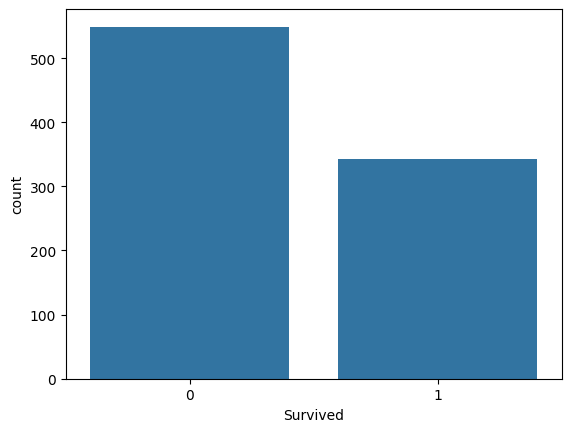

In [4]:
df.info()
df.describe()
sns.countplot(x='Survived', data=df)
plt.show()

In [7]:
# Uzupełnienie brakujących wartości średnią
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Wybór cech
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
#zmiana na zmienne binarne
X = pd.get_dummies(X, columns=['Sex', 'Embarked'], drop_first=True)
y = df['Survived']

In [8]:
#podział na dane testowe i treningowe
#20% danych testowych, 80% danych treningowych
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       105
           1       0.80      0.76      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



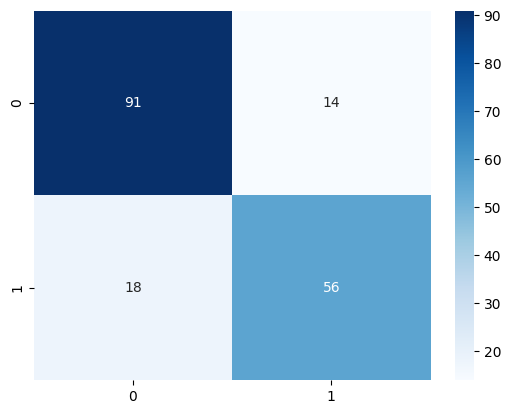

In [10]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
#model uczy się na podstawie danych treningowych
model.fit(X_train, y_train)
#model przewiduje czy pasażer przeżył dla danych testowych
y_pred = model.predict(X_test)

print("Dokładność:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

In [17]:
cm = confusion_matrix(y_test, y_pred)
#przemiana tabliyę wielowymiarową do jednowymiarowej.
TN, FP, FN, TP = cm.ravel()

#TN (True Negative) – wartość 0 została poprawnie przewidziana jako 0
#FP (False Positive) – wartość 0, ale model przewidział 1
#FN (False Negative) – wartość 1, ale model przewidział 0
#TP (True Positive) – wartość 1 i została poprawnie przewidziana jako 1

print("Spośród osób, które przeżyły model sklasyfikował poprawnie", TP,"osób, błędnie", FN)
print("Spośród osób, które nie przeżyły model sklasyfikował poprawnie", TN,"osób, błędnie", FP)

Spośród osób, które przeżyły model sklasyfikował poprawnie 56 osób, błędnie 18
Spośród osób, które nie przeżyły model sklasyfikował poprawnie 91 osób, błędnie 14


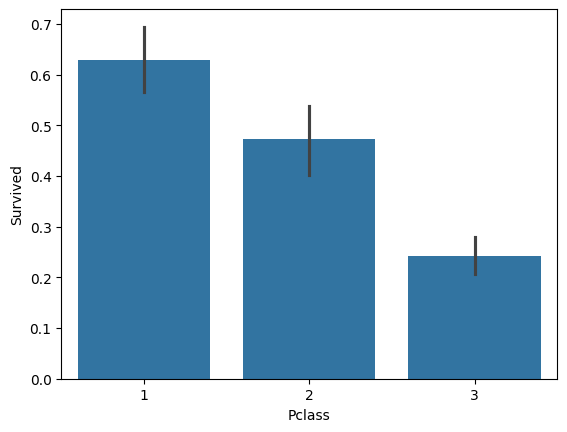

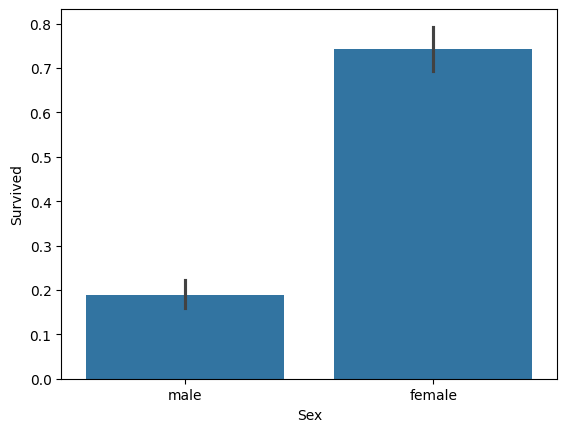

In [11]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()